# What will happen to Sri Lanka ? 🤔
**Project by P M Ranasinghe**

## Analyzing the dataset

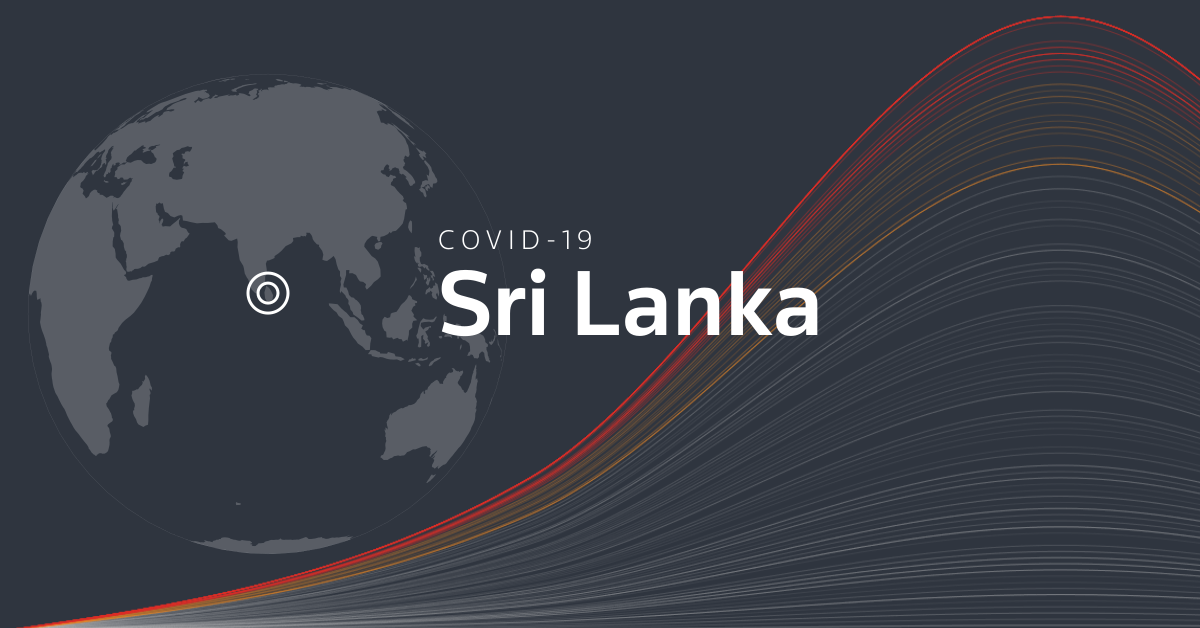

In [34]:
## Importing required libraries

from datetime import timedelta, date
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
import random
from sklearn.preprocessing import MinMaxScaler
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from IPython.display import Image
import folium
from folium.plugins import FastMarkerCluster
from folium.features import DivIcon
from IPython import display
%matplotlib inline

display.Image("https://graphics.thomsonreuters.com/cdn/2020/covid-global-tracker/share-cards/countries/en/sri-lanka.png")

### Glimpse of the dataset

In [35]:
##Reading the dataset
#You can download the most updated dataset from this link
#"https://covid.ourworldindata.org/data/owid-covid-data.csv"

df=pd.read_csv("owid-covid-data (1).csv")
df.drop(columns =['positive_rate','tests_per_case',"weekly_icu_admissions","continent","tests_units","reproduction_rate","icu_patients","icu_patients_per_million","hosp_patients","hosp_patients_per_million","weekly_icu_admissions_per_million","weekly_hosp_admissions","weekly_hosp_admissions_per_million","stringency_index","population","population_density","median_age","aged_65_older","aged_70_older","gdp_per_capita","extreme_poverty","cardiovasc_death_rate","diabetes_prevalence","female_smokers","male_smokers","handwashing_facilities","hospital_beds_per_thousand","life_expectancy","human_development_index","excess_mortality"],inplace=True)
df.head(10)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million
0,AFG,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AFG,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AFG,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AFG,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AFG,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,0.051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AFG,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,0.103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
##Columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109518 entries, 0 to 109517
Data columns (total 32 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               109518 non-null  object 
 1   location                               109518 non-null  object 
 2   date                                   109518 non-null  object 
 3   total_cases                            104825 non-null  float64
 4   new_cases                              104822 non-null  float64
 5   new_cases_smoothed                     103812 non-null  float64
 6   total_deaths                           94384 non-null   float64
 7   new_deaths                             94539 non-null   float64
 8   new_deaths_smoothed                    103812 non-null  float64
 9   total_cases_per_million                104270 non-null  float64
 10  new_cases_per_million                  104267 non-null  

### Data Prepocessing

In [37]:
##Finding out missing values in the dataset

print(df.isnull().sum())

iso_code                                      0
location                                      0
date                                          0
total_cases                                4693
new_cases                                  4696
new_cases_smoothed                         5706
total_deaths                              15134
new_deaths                                14979
new_deaths_smoothed                        5706
total_cases_per_million                    5248
new_cases_per_million                      5251
new_cases_smoothed_per_million             6256
total_deaths_per_million                  15676
new_deaths_per_million                    15521
new_deaths_smoothed_per_million            6256
new_tests                                 61088
total_tests                               61376
total_tests_per_thousand                  61376
new_tests_per_thousand                    61088
new_tests_smoothed                        52642
new_tests_smoothed_per_thousand         

In [38]:
##Filling the missing
#Backward filling method and interpolation

df.iloc[:,16:32]=df.iloc[:,16:32].interpolate(method='pad', limit=2)
df=df.fillna(method ='bfill')

In [39]:
##Getting only the data related to Sri Lanka
##Removing indexl column

df_SL=df.loc[df["iso_code"]=="LKA"]
df_SL=df_SL.iloc[254:].reset_index()
del df_SL['index']
df_SL.head(10)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million
0,LKA,Sri Lanka,2020-10-07,4459.0,207.0,154.143,13.0,0.0,0.0,208.236,...,0.0,5880.0,175190.0,5286.0,5286.0,0.0,0.0,0.03,0.25,247.0
1,LKA,Sri Lanka,2020-10-08,4488.0,29.0,158.000,13.0,0.0,0.0,209.590,...,0.0,5880.0,175190.0,5286.0,5286.0,0.0,0.0,0.03,0.25,247.0
2,LKA,Sri Lanka,2020-10-09,4523.0,35.0,162.143,13.0,0.0,0.0,211.224,...,0.0,5880.0,175190.0,5286.0,5286.0,0.0,0.0,0.03,0.25,247.0
3,LKA,Sri Lanka,2020-10-10,4628.0,105.0,176.143,13.0,0.0,0.0,216.128,...,0.0,5880.0,175190.0,5286.0,5286.0,0.0,0.0,0.03,0.25,247.0
4,LKA,Sri Lanka,2020-10-11,4752.0,124.0,192.857,13.0,0.0,0.0,221.919,...,0.0,5880.0,175190.0,5286.0,5286.0,0.0,0.0,0.03,0.25,247.0
5,LKA,Sri Lanka,2020-10-12,4844.0,92.0,190.143,13.0,0.0,0.0,226.215,...,0.0,5880.0,175190.0,5286.0,5286.0,0.0,0.0,0.03,0.25,247.0
6,LKA,Sri Lanka,2020-10-13,5038.0,194.0,112.286,13.0,0.0,0.0,235.275,...,0.0,5880.0,175190.0,5286.0,5286.0,0.0,0.0,0.03,0.25,247.0
7,LKA,Sri Lanka,2020-10-14,5170.0,132.0,101.571,13.0,0.0,0.0,241.439,...,0.0,5880.0,175190.0,5286.0,5286.0,0.0,0.0,0.03,0.25,247.0
8,LKA,Sri Lanka,2020-10-15,5244.0,74.0,108.000,13.0,0.0,0.0,244.895,...,0.0,5880.0,175190.0,5286.0,5286.0,0.0,0.0,0.03,0.25,247.0
9,LKA,Sri Lanka,2020-10-16,5354.0,110.0,118.714,13.0,0.0,0.0,250.032,...,0.0,5880.0,175190.0,5286.0,5286.0,0.0,0.0,0.03,0.25,247.0


In [40]:
##Description about the numerical columns

df_SL.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,...,3.120000e+02,3.120000e+02,312.0,312.000000,312.000000,312.000000,312.000000,312.000000,312.00,312.000000
mean,114993.692308,1113.080128,1081.080577,1117.628205,18.983974,17.572343,5370.212019,51.980901,50.486513,52.193324,...,1.540407e+06,3.758648e+05,175190.0,48757.964744,49624.003205,8.932244,7.193558,1.757179,0.25,2317.516026
std,97375.531510,976.648645,916.872344,1436.664636,29.259726,24.392387,4547.442887,45.609518,42.818004,67.092325,...,2.639203e+06,7.490455e+05,0.0,95670.963669,94042.012214,15.756249,12.325423,3.497378,0.00,4391.747036
min,4459.000000,29.000000,101.571000,13.000000,0.000000,0.000000,208.236000,1.354000,4.743000,0.607000,...,0.000000e+00,5.880000e+03,175190.0,151.000000,109.000000,0.000000,0.000000,0.030000,0.25,5.000000
25%,39083.000000,400.750000,411.642750,184.750000,2.000000,2.714000,1825.178500,18.715250,19.223500,8.628250,...,0.000000e+00,5.880000e+03,175190.0,5286.000000,5286.000000,0.000000,0.000000,0.030000,0.25,247.000000
50%,87137.500000,688.000000,658.643000,522.500000,5.000000,4.143000,4069.326000,32.130000,30.758500,24.401000,...,7.601565e+05,5.880000e+03,175190.0,9020.000000,7177.500000,3.550000,3.550000,0.030000,0.25,335.000000
75%,178431.500000,1823.500000,1734.428500,1363.000000,32.250000,35.286000,8332.761250,85.157500,80.997500,63.652000,...,1.492806e+06,3.447298e+05,175190.0,36033.000000,39928.500000,8.580000,6.970000,1.610000,0.25,1865.000000
max,351533.000000,6228.000000,3641.429000,5936.000000,160.000000,131.286000,16416.611000,290.848000,170.055000,277.212000,...,1.153475e+07,3.775976e+06,175190.0,593693.000000,475620.000000,71.500000,53.870000,17.630000,0.25,22211.000000


## Exploratory Data Analysis

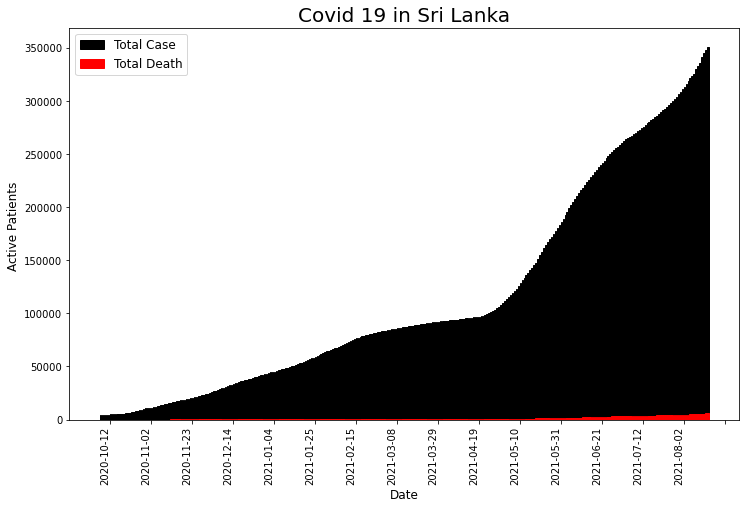

In [41]:
#Total Patients graph

fig,ax=plt.subplots(figsize=(12, 8))
plt.bar(df_SL["date"], df_SL["total_cases"],color="black",edgecolor="black")
plt.bar(df_SL["date"], df_SL["total_deaths"],color="red",edgecolor="red")
locator = mdates.WeekdayLocator(interval=3)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()
plt.xticks(rotation=90)
plt.title("Covid 19 in Sri Lanka",fontsize=20)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Active Patients ",fontsize=12)
plt.legend(["Total Case","Total Death"],fontsize=12)



Text(0, 0.5, 'Deaths')

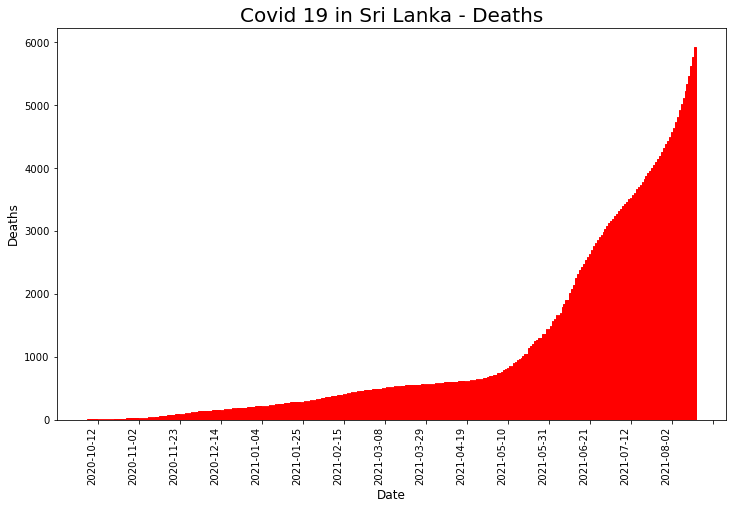

In [42]:
#Deaths so far

fig,ax=plt.subplots(figsize=(12, 8))
plt.bar(df_SL["date"], df_SL["total_deaths"],color="red",edgecolor="red")
locator = mdates.WeekdayLocator(interval=3)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()
plt.xticks(rotation=90)
plt.title("Covid 19 in Sri Lanka - Deaths",fontsize=20)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Deaths",fontsize=12)

### How Sri Lanka is doing so far

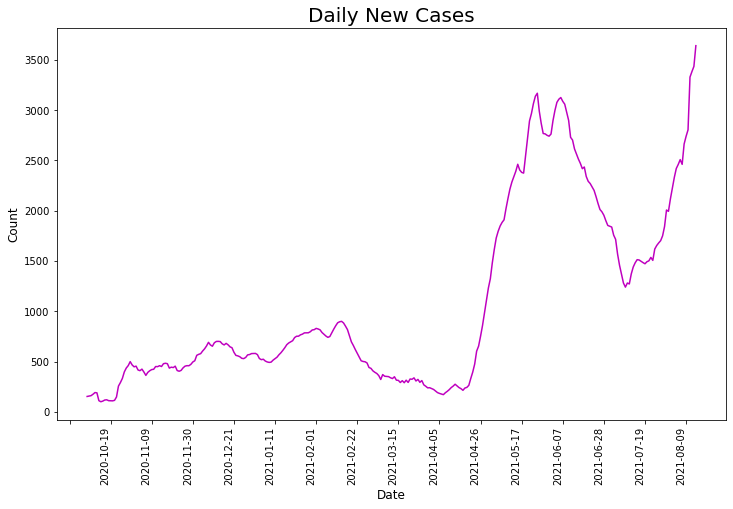

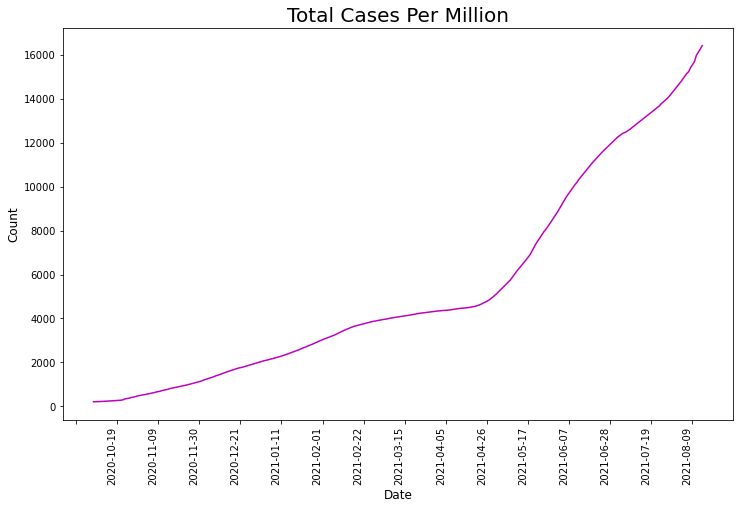

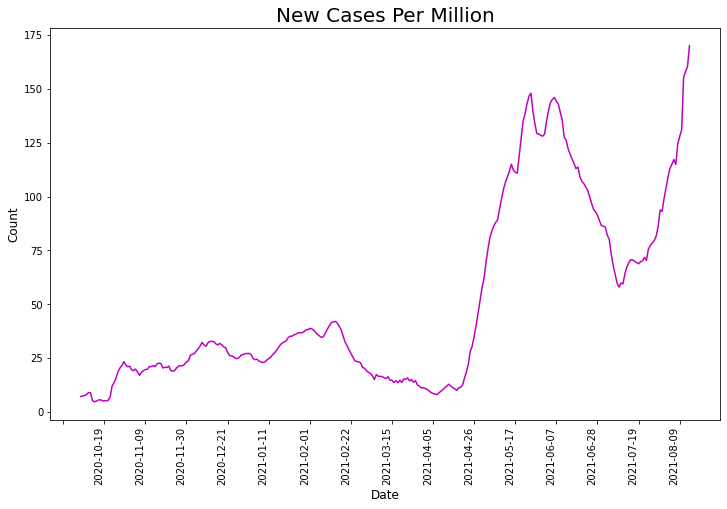

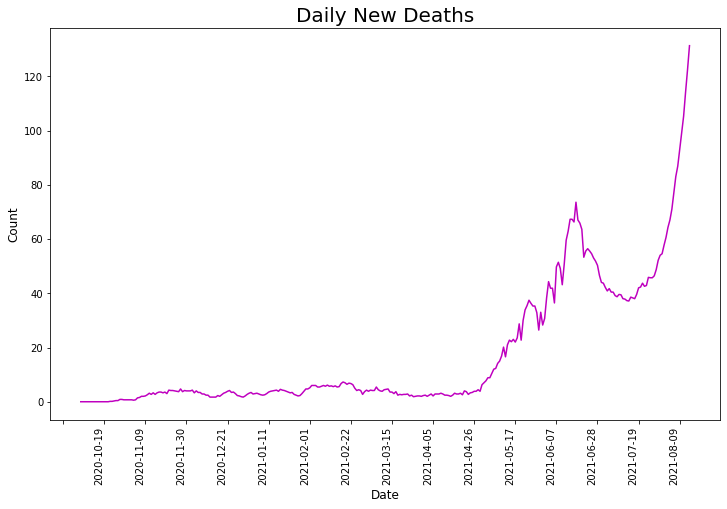

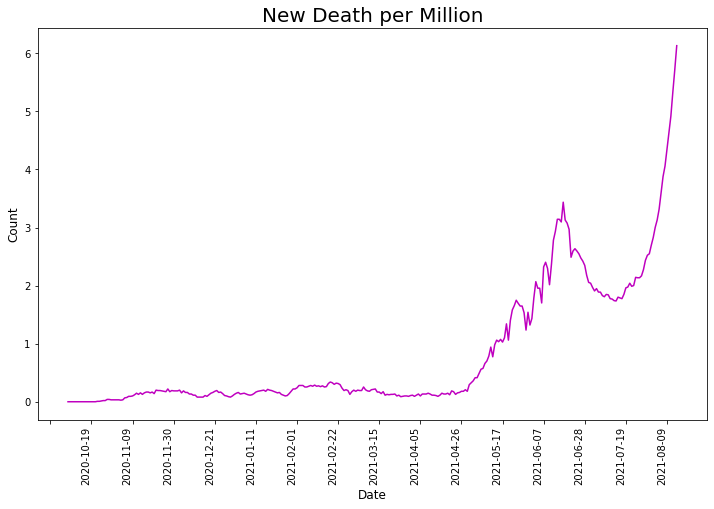

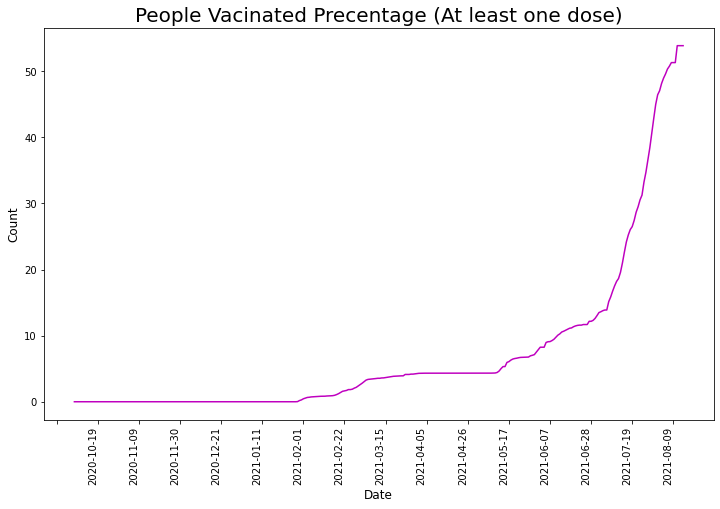

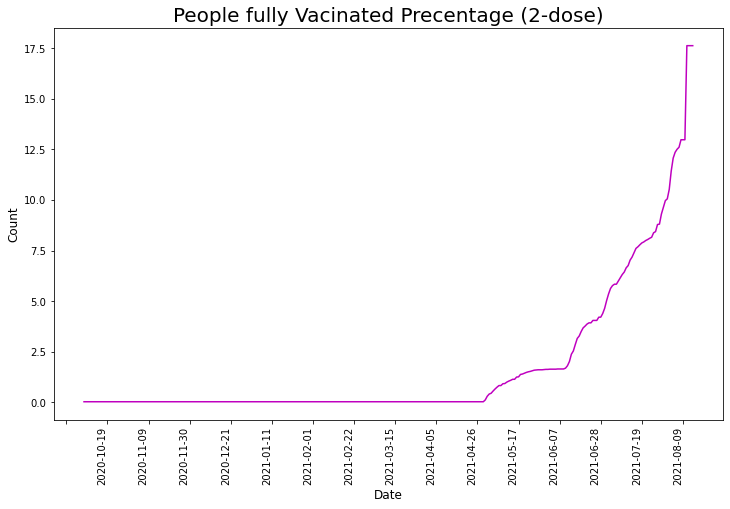

In [43]:
graph_lst=["new_cases_smoothed",'total_cases_per_million','new_cases_smoothed_per_million',"new_deaths_smoothed",'new_deaths_smoothed_per_million','people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']
titles=["Daily New Cases","Total Cases Per Million","New Cases Per Million","Daily New Deaths","New Death per Million","People Vacinated Precentage (At least one dose)","People fully Vacinated Precentage (2-dose)"]

for i in range(len(graph_lst)):
    name=graph_lst[i]
    fig,ax=plt.subplots(figsize=(12, 8))
    plt.plot(df_SL["date"], df_SL[name],color="m")

    locator = mdates.WeekdayLocator(interval=3)
    plt.gca().xaxis.set_major_locator(locator)
    plt.gcf().autofmt_xdate()
    plt.xticks(rotation=90)
    plt.title(titles[i],fontsize=20)
    plt.xlabel("Date",fontsize=12)
    plt.ylabel("Count",fontsize=12)


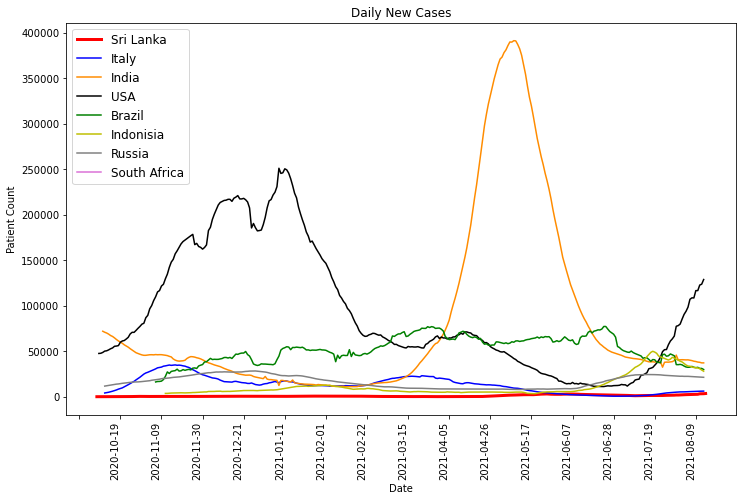

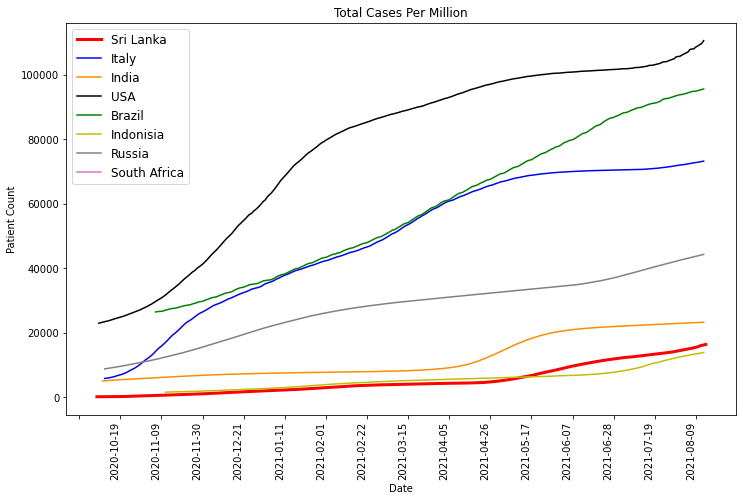

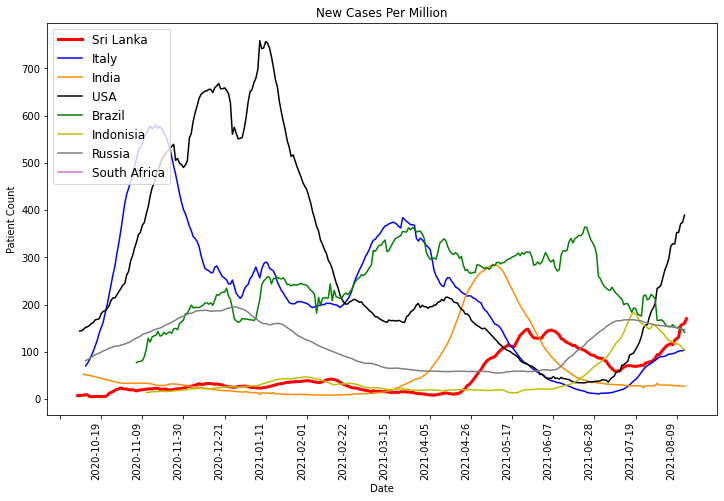

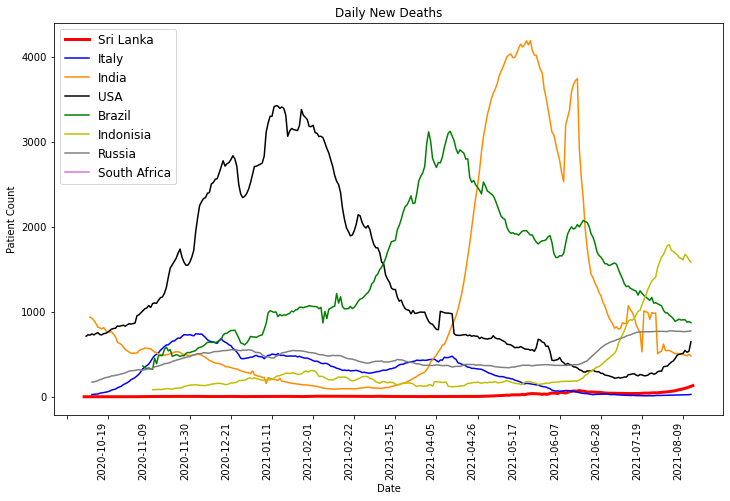

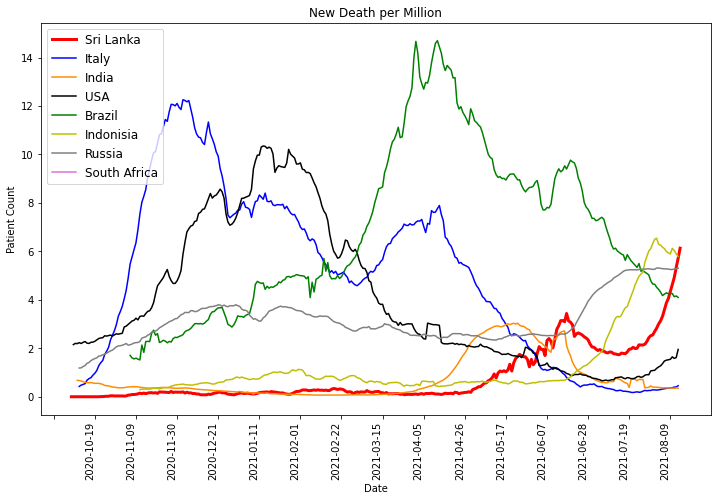

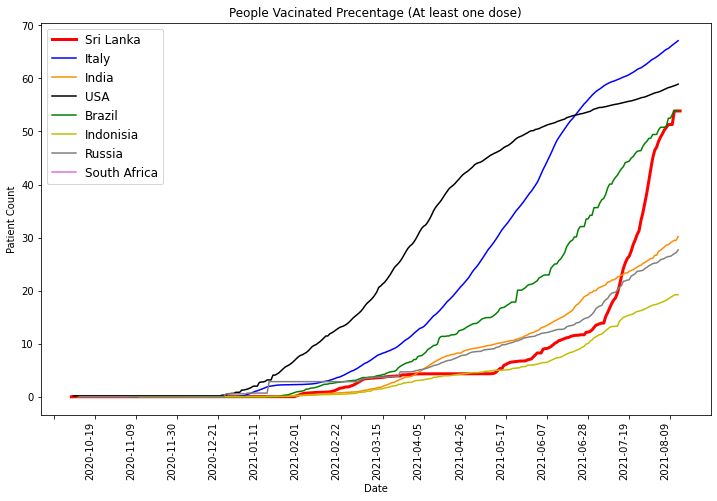

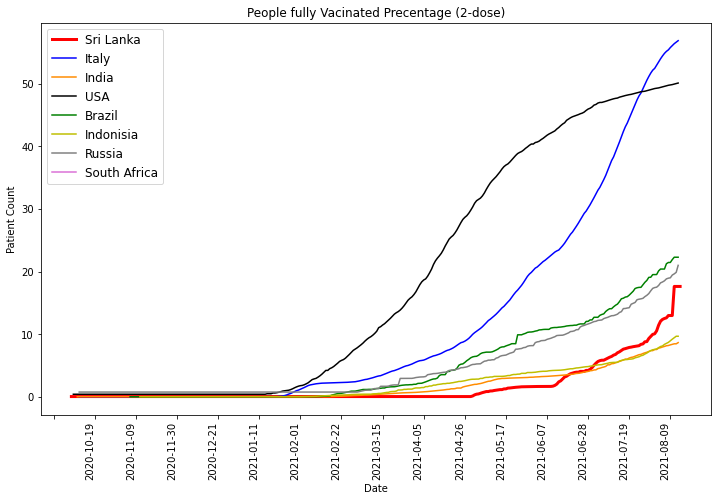

In [44]:
##Compare Sri Lanka with other countries

df_Italy=df.loc[df["iso_code"]=="ITA"]
df_Italy=df_Italy.iloc[254:-1].reset_index()
df_India=df.loc[df["iso_code"]=="IND"]
df_India=df_India.iloc[254:-1].reset_index()
df_USA=df.loc[df["iso_code"]=="USA"]
df_USA=df_USA.iloc[260:-1].reset_index()
df_Brazil=df.loc[df["iso_code"]=="BRA"]
df_Brazil=df_Brazil.iloc[254:-1].reset_index()
df_Indonisia=df.loc[df["iso_code"]=="IDN"]
df_Indonisia=df_Indonisia.iloc[254:-1].reset_index()
df_Russia=df.loc[df["iso_code"]=="RUS"]
df_Russia=df_Russia.iloc[254:-1].reset_index()
df_SA=df.loc[df["iso_code"]=="ZSF"]
df_SA=df_SA.iloc[254:-1].reset_index()

for i in range(len(graph_lst)):
    name=graph_lst[i]
    fig,ax=plt.subplots(figsize=(12, 8))
    plt.plot(df_SL["date"], df_SL[name],color="red",lw=3)
    plt.plot(df_Italy["date"], df_Italy[name],color="blue")
    plt.plot(df_India["date"], df_India[name],color="darkorange")
    plt.plot(df_USA["date"], df_USA[name],color="black")
    plt.plot(df_Brazil["date"], df_Brazil[name],color="green")
    plt.plot(df_Indonisia["date"], df_Indonisia[name],color="y")
    plt.plot(df_Russia["date"], df_Russia[name],color="grey")
    plt.plot(df_SA["date"], df_SA[name],color="orchid")

    locator = mdates.WeekdayLocator(interval=3)
    plt.gca().xaxis.set_major_locator(locator)
    plt.gcf().autofmt_xdate()
    plt.xticks(rotation=90)
    plt.title(titles[i])
    plt.xlabel("Date")
    plt.ylabel("Patient Count")
    plt.legend(["Sri Lanka","Italy","India","USA","Brazil","Indonisia","Russia","South Africa"],fontsize=12,loc=2)

**Sri Lanka has the highest death rate per million. It is still increasing, not yet reached its peak, while other critical countries bring down their death and infection rates by making the best decisions at the correct time.**

In [13]:
%%html
<marquee style='width: 100% ;height:100%; color: #B61919 ;'>
    <b>SRI LANKA IS IN A IMMEDIATE DANGER</b></marquee> 

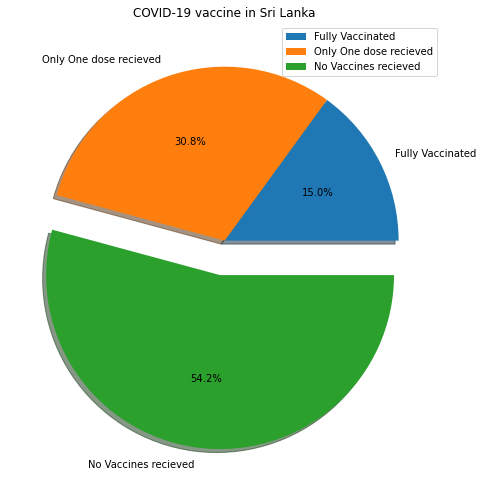

In [14]:
#Vaccination details

total_population=21413250
fully_vacianted=df_SL["people_fully_vaccinated"].iloc[-4]
one_vacine=df_SL["people_vaccinated"].iloc[-4]-fully_vacianted
No_vacines=total_population-one_vacine
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = 3)
plt.figure(figsize=(8,8))
myexplode = [0, 0, 0.2]
plt.title('COVID-19 vaccine in Sri Lanka')

plt.pie([fully_vacianted,one_vacine,No_vacines], labels =["Fully Vaccinated","Only One dose recieved","No Vaccines recieved"], explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.legend(["Fully Vaccinated","Only One dose recieved","No Vaccines recieved"], loc='best')
plt.show()

## Predicting Models

### Deep learning Approch

In [15]:
##Pattern Recognizition using RNN

data_deaths_column=df_SL["new_deaths_smoothed"]
new_cases_column=df_SL["new_cases_smoothed"]

data_deaths=data_deaths_column.values.reshape(-1,1)
data_new_cases=new_cases_column.values.reshape(-1,1)

MinMax_death=MinMaxScaler(feature_range=(0,1))
MinMax_death.fit(data_deaths)
data_deaths_tramsform=MinMax_death.transform(data_deaths)
data_deaths_scaled=data_deaths_tramsform[190:230]

MinMax_case=MinMaxScaler(feature_range=(0,1))
MinMax_case.fit(data_new_cases)
data_new_cases_transform=MinMax_case.transform(data_new_cases)
data_new_cases_scaled=data_new_cases_transform[190:230]

train_death=[]
label_death=[]

train_newcases=[]
label_newcases=[]

win_size=10
for i in range(0,len(data_deaths_scaled)-win_size):
    train_death.append(data_deaths_scaled[i:i+win_size])
    label_death.append(data_deaths_scaled[i+win_size])
    
for i in range(0,len(data_new_cases_scaled)-win_size):
    train_newcases.append(data_new_cases_scaled[i:i+win_size])
    label_newcases.append(data_new_cases_scaled[i+win_size])  


train_death=np.array(train_death)
label_death=np.array(label_death)

train_newcases=np.array(train_newcases)
label_newcases=np.array(label_newcases)

In [16]:
#Making a model to identify the pattern of daily deaths

from keras.models import Sequential
import keras.layers as layers

death_model=Sequential()
death_model.add(layers.LSTM(units=100,return_sequences=True,input_shape=(train_death.shape[1:])))
death_model.add(layers.Dropout(0.2))
death_model.add(layers.LSTM(units=100,return_sequences=True))
death_model.add(layers.Dropout(0.2))
death_model.add(layers.LSTM(units=100,return_sequences=False))
death_model.add(layers.Dropout(0.2))
death_model.add(layers.Dense(1,activation="linear"))
print(death_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 10, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 100)           80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [17]:
#Making a model to identify the pattern of daily new cases

Newcases_model=Sequential()
Newcases_model.add(layers.LSTM(units=100,return_sequences=True,input_shape=(train_newcases.shape[1:])))
Newcases_model.add(layers.Dropout(0.2))
Newcases_model.add(layers.LSTM(units=100,return_sequences=True))
Newcases_model.add(layers.Dropout(0.2))
Newcases_model.add(layers.LSTM(units=100,return_sequences=False))
Newcases_model.add(layers.Dropout(0.2))
Newcases_model.add(layers.Dense(1,activation="linear"))
print(Newcases_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 100)           40800     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 100)           80400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [18]:
#Training the models

death_model.compile(loss="mse",optimizer="adam")
history_death=death_model.fit(train_death,label_death,epochs=25,validation_split=0.1)

Epoch 1/25
1/1 [==============================] - 10s 10s/step - loss: 0.0144 - val_loss: 0.0501
Epoch 2/25
1/1 [==============================] - 0s 99ms/step - loss: 0.0093 - val_loss: 0.0356
Epoch 3/25
1/1 [==============================] - 0s 85ms/step - loss: 0.0053 - val_loss: 0.0214
Epoch 4/25
1/1 [==============================] - 0s 77ms/step - loss: 0.0027 - val_loss: 0.0093
Epoch 5/25
1/1 [==============================] - 0s 71ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 6/25
1/1 [==============================] - 0s 72ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 7/25
1/1 [==============================] - 0s 76ms/step - loss: 0.0038 - val_loss: 0.0052
Epoch 8/25
1/1 [==============================] - 0s 79ms/step - loss: 0.0027 - val_loss: 0.0088
Epoch 9/25
1/1 [==============================] - 0s 80ms/step - loss: 0.0019 - val_loss: 0.0132
Epoch 10/25
1/1 [==============================] - 0s 93ms/step - loss: 0.0018 - val_loss: 0.0167
Epoch 11/25
1/1 [============

In [19]:
#Training

Newcases_model.compile(loss="mse",optimizer="adam")
history_newcases=Newcases_model.fit(train_newcases,label_newcases,epochs=25,validation_split=0.1)

Epoch 1/25
1/1 [==============================] - 9s 9s/step - loss: 0.3009 - val_loss: 0.6372
Epoch 2/25
1/1 [==============================] - 0s 101ms/step - loss: 0.2498 - val_loss: 0.5321
Epoch 3/25
1/1 [==============================] - 0s 82ms/step - loss: 0.2037 - val_loss: 0.4262
Epoch 4/25
1/1 [==============================] - 0s 90ms/step - loss: 0.1611 - val_loss: 0.3126
Epoch 5/25
1/1 [==============================] - 0s 81ms/step - loss: 0.1120 - val_loss: 0.1920
Epoch 6/25
1/1 [==============================] - 0s 85ms/step - loss: 0.0663 - val_loss: 0.0766
Epoch 7/25
1/1 [==============================] - 0s 83ms/step - loss: 0.0257 - val_loss: 0.0036
Epoch 8/25
1/1 [==============================] - 0s 102ms/step - loss: 0.0047 - val_loss: 0.0343
Epoch 9/25
1/1 [==============================] - 0s 93ms/step - loss: 0.0239 - val_loss: 0.0828
Epoch 10/25
1/1 [==============================] - 0s 80ms/step - loss: 0.0567 - val_loss: 0.0521
Epoch 11/25
1/1 [============

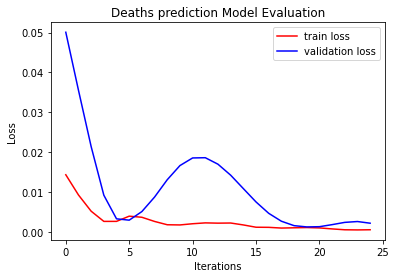

In [20]:
#Performance of the model make to detect death pattern

plt.plot(history_death.history["loss"],"r",label="train loss")
plt.plot(history_death.history["val_loss"],"b",label="validation loss")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Deaths prediction Model Evaluation")
plt.show()

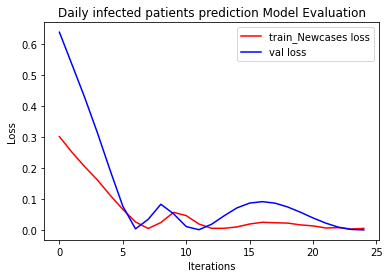

In [21]:
#Performance of the model make to detect daily new cases pattern

plt.plot(history_newcases.history["loss"],"r",label="train_Newcases loss")
plt.plot(history_newcases.history["val_loss"],"b",label="val loss")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Daily infected patients prediction Model Evaluation")
plt.show()

In [22]:
##Computing the R2 score of the two models

from sklearn.metrics import r2_score
prd_death=death_model.predict(train_death)
prd_cases=Newcases_model.predict(train_newcases)
r2_death=r2_score(label_death,prd_death)
r2_cases=r2_score(label_newcases,prd_cases)

print("R2 Score of deaths prediction model      ",r2_death*100)
print("R2 Score of daily cases prediction model ",r2_cases*100)

R2 Score of deaths prediction model       84.22286437542348
R2 Score of daily cases prediction model  83.10596351877977


##  Predicting What will happen to Sri Lanka in next month

Text(0.5, 1.0, 'Forcasting of Daily Cases')

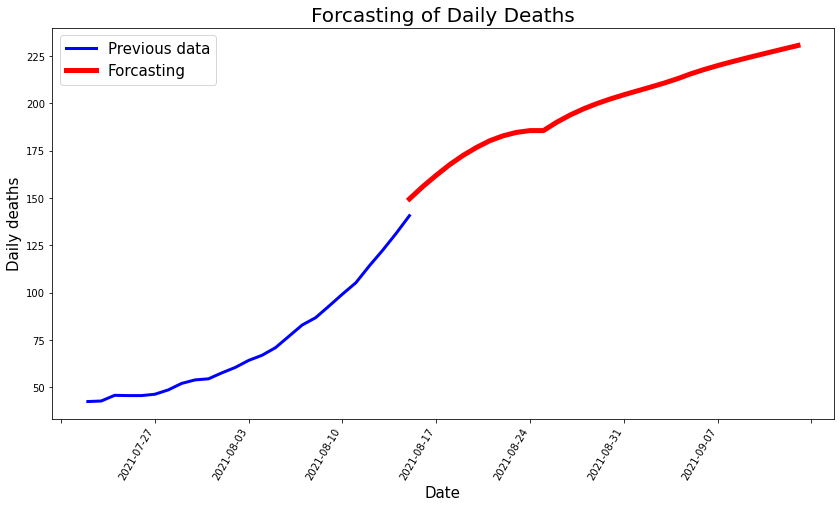

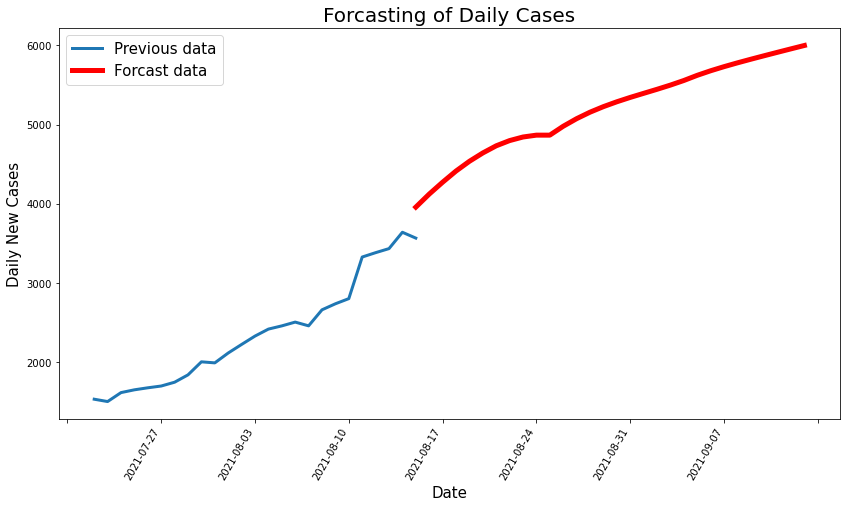

In [23]:
#Predicting upcoming daily deaths and new cases without any restrictions in next month

show_previos_days=25
predict_days=30
future_deaths_scaled=[]
#element=train_death[-1]
element=data_deaths_tramsform[len(data_deaths_tramsform)-win_size:len(data_deaths_tramsform)]
for i in range(predict_days): 
    last_window=np.array(element).reshape(1,win_size,1)
    new_prediction=death_model.predict([[last_window]])
    future_deaths_scaled.append(new_prediction[0][0])
    element=np.delete(last_window[0], [0])
    element=np.append(element,new_prediction)

future_deaths_scaled=np.array(future_deaths_scaled).reshape(-1,1)
future_deaths=MinMax_death.inverse_transform(future_deaths_scaled)+36


future_cases_scaled=[]
element=data_new_cases_transform[len(data_new_cases_transform)-win_size:len(data_new_cases_transform)]
for i in range(predict_days): 
    last_window=np.array(element).reshape(1,win_size,1)
    new_prediction=Newcases_model.predict([[last_window]])
    future_cases_scaled.append(new_prediction[0][0])
    element=np.delete(last_window[0], [0])
    element=np.append(element,new_prediction)

future_cases_scaled=np.array(future_cases_scaled).reshape(-1,1)
future_cases=MinMax_case.inverse_transform(future_deaths_scaled)+1000

start_dt = date.today()-timedelta(days=1)
end_dt = (start_dt+timedelta(days=predict_days-1))
date_lst=[]
previos_days=df_SL["date"].values[df_SL.shape[0]-show_previos_days:df_SL.shape[0]]

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)
for dt in daterange(start_dt, end_dt):
    date_lst.append(dt.strftime("%Y-%m-%d"))


#last_30_deaths=data_deaths[len(data_deaths)-25:len(data_deaths)]
last_30_deaths=data_deaths_column[len(data_deaths_column)-show_previos_days:len(data_deaths_column)]

plt.figure(figsize=(14,8))
plt.plot(previos_days,last_30_deaths,"b",label="Previous data",lw=3)
plt.plot(date_lst,future_deaths,"r",label="Forcasting",lw=5)
locator = mdates.WeekdayLocator(interval=1)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()
plt.legend(fontsize=15,loc=2)
plt.xticks(rotation=60)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Daily deaths",fontsize=15)
plt.title("Forcasting of Daily Deaths",fontsize=20)

#last_30_cases=data_new_cases[len(data_new_cases)-25:len(data_new_cases)]
last_30_cases=new_cases_column[len(new_cases_column)-show_previos_days:len(new_cases_column)]
plt.figure(figsize=(14,8))
plt.plot(previos_days,last_30_cases,label="Previous data",lw=3)
plt.plot(date_lst,future_cases,"r",label="Forcast data",lw=5)

locator = mdates.WeekdayLocator(interval=1)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()
plt.xticks(rotation=60)
plt.legend(fontsize=15,loc=2)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Daily New Cases",fontsize=15)
plt.title("Forcasting of Daily Cases",fontsize=20)

### Without proper restictions,daily infectous people count can be rise upto even 6000 and daily deaths can be increase upto 250 and even more

In [24]:
%%html
<marquee style='width: 100% ;height:100%; color: #B61919 ;'>
    <b>DECISION HAS TO BE TAKEN, BEFORE IT GETS TOO LATE. WAITING IS A MISTAKE</b></marquee> 

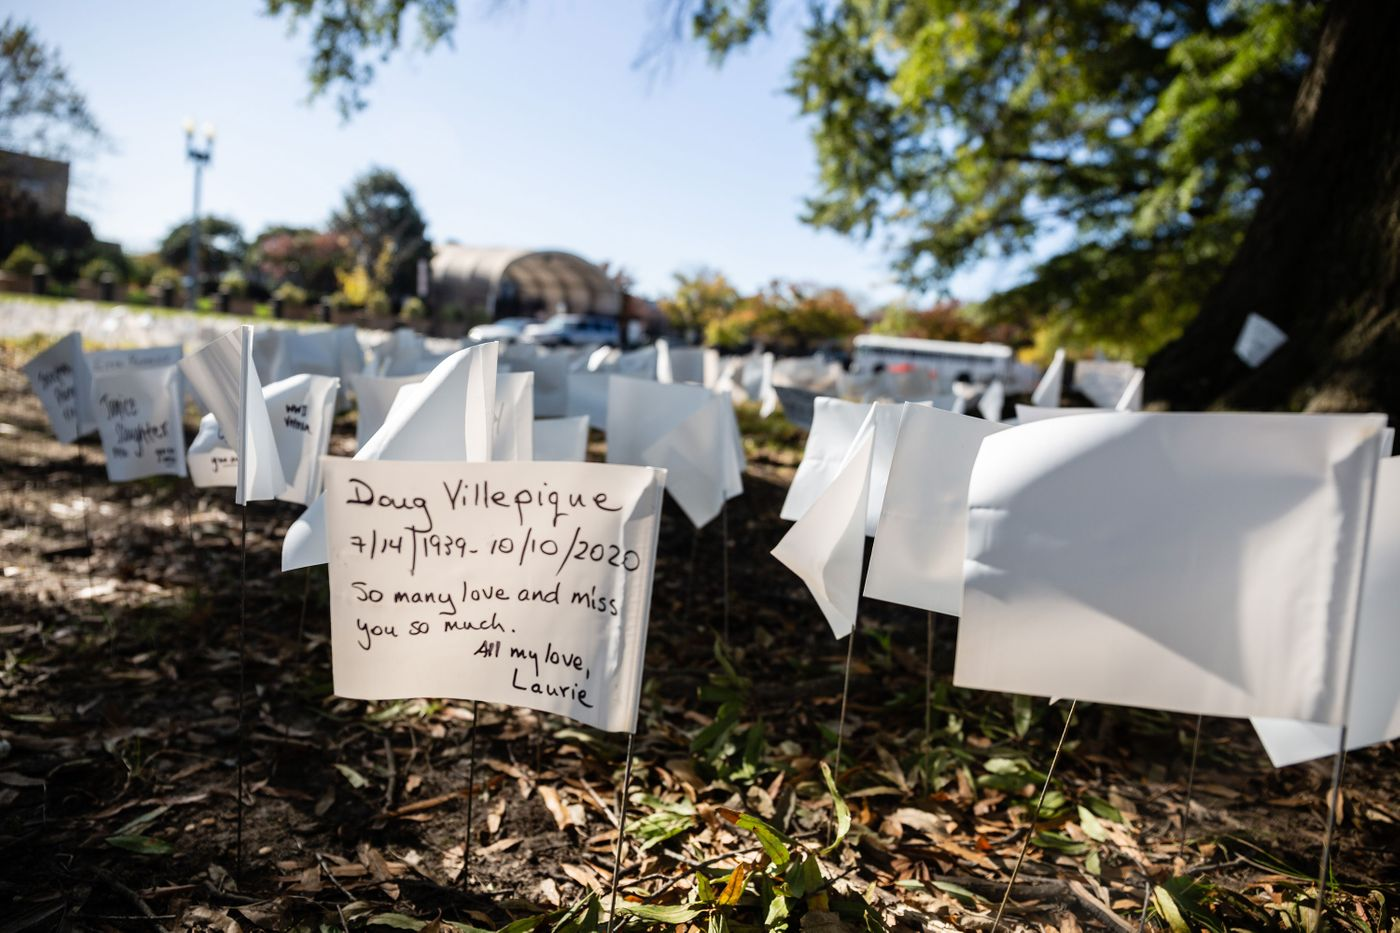

In [25]:
display.Image("https://pyxis.nymag.com/v1/imgs/e8b/0d9/c6c04ad04dfdf9c9f49d0c5662e3934f51-Election-DC-Fadek-126.2x.rhorizontal.w700.jpg")

### Impact of ISLAND WIDE CURFEW

In [26]:
#####Island Wide Cerfew prediction model
#Here I take the example how China overcome the COVID 19 by completely locking down COVID 19 areas.

df_China=df.loc[df["iso_code"]=="CHN"]
df_China=df_China.iloc[20:80]

pattern_data=df_China["new_deaths_smoothed"]

pattern_data=pattern_data.values.reshape(-1,1)
MinMax_pattern=MinMaxScaler(feature_range=(0,1))
MinMax_pattern.fit(pattern_data)
pattern_data_scaled=MinMax_pattern.transform(pattern_data)


train_pattern=[]
label_pattern=[]

win_size=10
for i in range(0,len(pattern_data_scaled)-win_size):
    train_pattern.append(pattern_data_scaled[i:i+win_size])
    label_pattern.append(pattern_data_scaled[i+win_size])
    
train_pattern=np.array(train_pattern)
label_pattern=np.array(label_pattern)

pattern_model=Sequential()
pattern_model.add(layers.LSTM(units=100,return_sequences=True,input_shape=(train_death.shape[1:])))
pattern_model.add(layers.Dropout(0.2))
pattern_model.add(layers.LSTM(units=100,return_sequences=True))
pattern_model.add(layers.Dropout(0.2))
pattern_model.add(layers.LSTM(units=100,return_sequences=False))
pattern_model.add(layers.Dropout(0.2))
pattern_model.add(layers.Dense(1,activation="linear"))

pattern_model.compile(loss="mse",optimizer="adam")
history_pattern=pattern_model.fit(train_pattern,label_pattern,epochs=25,validation_split=0.1)


Epoch 1/25
2/2 [==============================] - 10s 3s/step - loss: 0.1017 - val_loss: 0.0014
Epoch 2/25
2/2 [==============================] - 0s 66ms/step - loss: 0.0493 - val_loss: 0.0087
Epoch 3/25
2/2 [==============================] - 0s 106ms/step - loss: 0.0158 - val_loss: 0.0219
Epoch 4/25
2/2 [==============================] - 0s 86ms/step - loss: 0.0296 - val_loss: 0.0138
Epoch 5/25
2/2 [==============================] - 0s 139ms/step - loss: 0.0169 - val_loss: 0.0045
Epoch 6/25
2/2 [==============================] - 0s 141ms/step - loss: 0.0128 - val_loss: 0.0011
Epoch 7/25
2/2 [==============================] - 0s 115ms/step - loss: 0.0134 - val_loss: 2.9541e-04
Epoch 8/25
2/2 [==============================] - 0s 72ms/step - loss: 0.0137 - val_loss: 1.4820e-04
Epoch 9/25
2/2 [==============================] - 0s 76ms/step - loss: 0.0084 - val_loss: 1.4273e-04
Epoch 10/25
2/2 [==============================] - 0s 67ms/step - loss: 0.0059 - val_loss: 3.9493e-05
Epoch 11/2

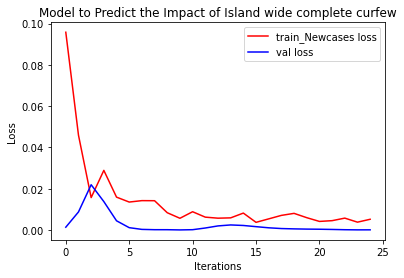

In [27]:
#Model Performances

plt.plot(history_pattern.history["loss"],"r",label="train_Newcases loss")
plt.plot(history_pattern.history["val_loss"],"b",label="val loss")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Model to Predict the Impact of Island wide complete curfew")
plt.show()

### 🔴How Island wide Curfew for the next three weeks affect the number of infected people🔴

In [28]:
future_cases_controlled=[]
element=data_new_cases_transform[len(data_new_cases_transform)-win_size:len(data_new_cases_transform)]
for i in range(predict_days): 
    last_window=np.array(element).reshape(1,win_size,1)
    new_prediction=pattern_model.predict([[last_window]])
    future_cases_controlled.append(new_prediction[0][0])
    element=np.delete(last_window[0], [0])
    element=np.append(element,new_prediction)

future_cases_controlled=np.array(future_cases_controlled).reshape(-1,1)
future_cases_controlled=MinMax_case.inverse_transform(future_cases_controlled)+1000

lst_future_cases=[int(round(i[0],0)) for i in future_cases]
lst_future_cases_controlled=[int(round(i[0],0)) for i in future_cases_controlled]
lst_future_cases_controlled[0]=int(last_30_cases.values[-1])
deaths_forcast_table=pd.DataFrame(list(zip(date_lst,lst_future_cases,lst_future_cases_controlled)),columns=["Date","Predicted Patients without restrictions","Predicted Cases under completely lockdown"])
print(deaths_forcast_table.to_markdown(index=False))

| Date       |   Predicted Patients without restrictions |   Predicted Cases under completely lockdown |
|:-----------|------------------------------------------:|--------------------------------------------:|
| 2021-08-15 |                                      3958 |                                        3567 |
| 2021-08-16 |                                      4123 |                                        3275 |
| 2021-08-17 |                                      4272 |                                        3328 |
| 2021-08-18 |                                      4413 |                                        3328 |
| 2021-08-19 |                                      4536 |                                        3290 |
| 2021-08-20 |                                      4641 |                                        3223 |
| 2021-08-21 |                                      4732 |                                        3100 |
| 2021-08-22 |                                      479

### 🔴How Island wide Curfew for the next three weeks affect daily deaths🔴

In [29]:
future_deaths_controlled=[]
element=data_deaths_tramsform[len(data_deaths_tramsform)-win_size:len(data_deaths_tramsform)]
for i in range(predict_days): 
    last_window=np.array(element).reshape(1,win_size,1)
    new_prediction=pattern_model.predict([[last_window]])
    future_deaths_controlled.append(new_prediction[0][0])
    element=np.delete(last_window[0], [0])
    element=np.append(element,new_prediction)

future_deaths_controlled=np.array(future_deaths_controlled).reshape(-1,1)
future_deaths_controlled=MinMax_death.inverse_transform(future_deaths_controlled)+60

lst_future_deaths=[int(round(i[0],0)) for i in future_deaths]
lst_future_deaths_controlled=[max(2,int(round(i[0],0))) for i in future_deaths_controlled]
lst_future_deaths_controlled[0]=int(last_30_deaths.values[-1])
deaths_forcast_table=pd.DataFrame(list(zip(date_lst,lst_future_deaths,lst_future_deaths_controlled)),columns=["Date","Predicted deaths without restrictions","Predicted deaths under completely lockdown"])
deaths_forcast_table["Lives Saved"]=deaths_forcast_table["Predicted deaths without restrictions"]-deaths_forcast_table["Predicted deaths under completely lockdown"]
print(deaths_forcast_table.to_markdown(index=False))

| Date       |   Predicted deaths without restrictions |   Predicted deaths under completely lockdown |   Lives Saved |
|:-----------|----------------------------------------:|---------------------------------------------:|--------------:|
| 2021-08-15 |                                     150 |                                          140 |            10 |
| 2021-08-16 |                                     156 |                                          136 |            20 |
| 2021-08-17 |                                     162 |                                          138 |            24 |
| 2021-08-18 |                                     168 |                                          139 |            29 |
| 2021-08-19 |                                     173 |                                          138 |            35 |
| 2021-08-20 |                                     177 |                                          135 |            42 |
| 2021-08-21 |                          

In [30]:
total_lives_saved=sum(deaths_forcast_table["Lives Saved"])
print(f"❗❗ Lockdown Procedures can save around {total_lives_saved} lives in next four weeks")

❗❗ Lockdown Procedures can save around 2845 lives in next four weeks


Text(0.5, 1.0, 'Daily Cases Prediction')

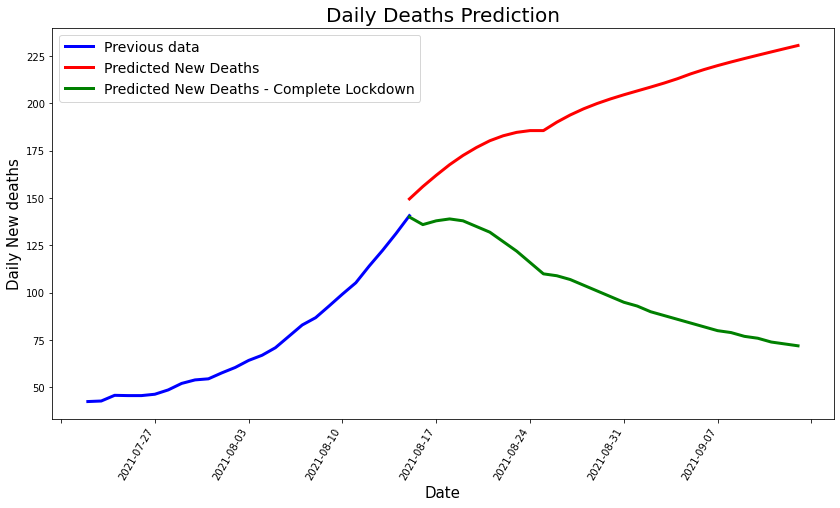

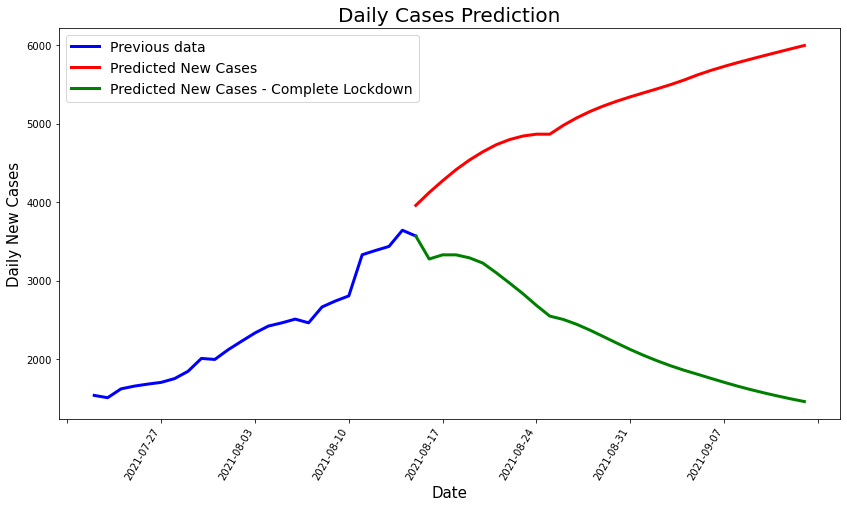

In [31]:
plt.figure(figsize=(14,8))
plt.plot(previos_days,last_30_deaths,"b",label="Previous data",lw=3)
plt.plot(date_lst,future_deaths,"r",label="Predicted New Deaths",lw=3)
plt.plot(date_lst,lst_future_deaths_controlled,"g",label="Predicted New Deaths - Complete Lockdown",lw=3)
locator = mdates.WeekdayLocator(interval=1)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()
plt.legend(fontsize=14,loc=2)
plt.xticks(rotation=60)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Daily New deaths",fontsize=15)
plt.title("Daily Deaths Prediction",fontsize=20)

plt.figure(figsize=(14,8))
plt.plot(previos_days,last_30_cases,"b",label="Previous data",lw=3)
plt.plot(date_lst,future_cases,"r",label="Predicted New Cases",lw=3)
plt.plot(date_lst,lst_future_cases_controlled,"g",label="Predicted New Cases - Complete Lockdown",lw=3)
locator = mdates.WeekdayLocator(interval=1)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()
plt.xticks(rotation=60)
plt.legend(fontsize=14,loc=2)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Daily New Cases",fontsize=15)
plt.title("Daily Cases Prediction",fontsize=20)

**Lockdown Procedures definitely gives better results, saving more than 2000 innocent lives in the next four weeks, gradually making Sri Lanka to a COVID free country. 🙏🙏**

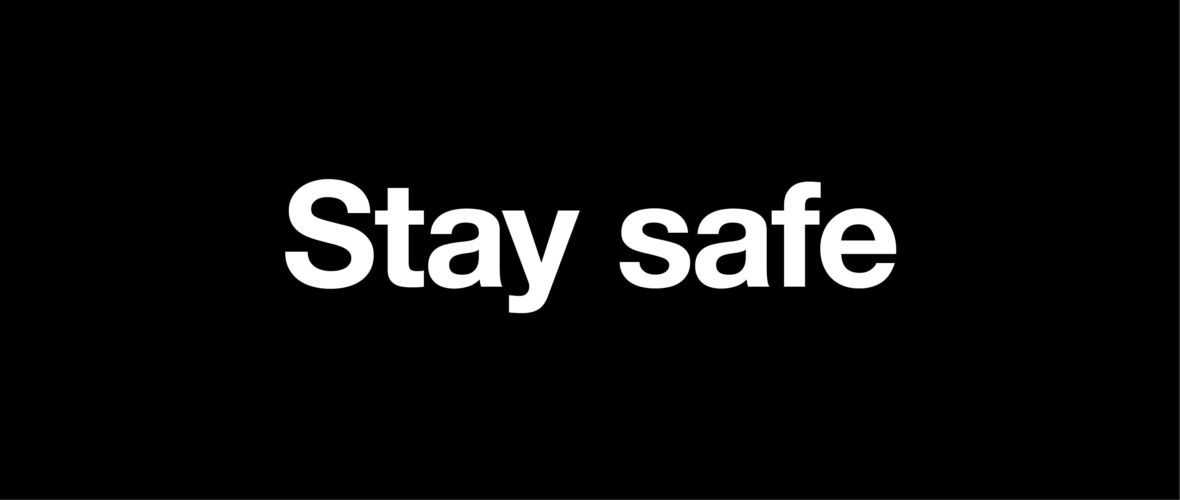

In [32]:
display.Image("https://www.vanmoof.com/blog/assets/uploads/images/ride-safe/_1180xAUTO_fit_center-center_80_none/Stay-safe-blog.jpg")

In [33]:
%%html
<marquee style='width: 100% ;height:100%; color: #0F52BA ;'>
    <b>Project by P M Ranasinghe</b>
    </marquee> 